In [10]:
import os 
import getpass
from typing import Annotated, Dict, List, Any
from typing_extensions import TypedDict

def setup_environment():
    """Setup your API KEYs"""
    if not os.environ.get("OPENAI_API_KEY"):
        openai_key = getpass.getpass("Enter your OPENAI API KEY")
        os.environ["OPENAI_API_KEY"] = openai_key

    if not os.environ.get("LANGSMITH_API_KEY"):
        langsmith_key = getpass.getpass("ENTER your LAngsmith API KEY")
        if langsmith_key:
            os.environ["LANGSMITH_API_KEY"] = langsmith_key
            os.environ["LANGCHAIN_TRACING_V2"] ="true"
            os.environ["LANGCHAIN_PROJECT"] = "Langgraph tutorial"
        else:
            print("skipping langsmith set up")


    print("Envioenment setup completed")
            
    
    

In [11]:
setup_environment()

Enter your OPENAI API KEY ········
ENTER your LAngsmith API KEY ········


Envioenment setup completed


### Different components of Langgraph

1. State
   . The Memory of your application
   Share data structure that persistance accross all steps
   * Can contain message, variabelse, flags or any data
  
2. Nodes

   * Individual functions or operations in your workflow
   * Each Nodes receives the current state and returns the updates
   * Think of them as "workers" that do specific tasks

3. Edges

   * Connections between the Nodes that define the flow
   * can be simple edge (A->B) or conditional (A->B or C based on the condition)

4. Graph

   * The ccomplete workflow combining nodes and edges
   * 

In [12]:
from langgraph.graph import StateGraph , START, END
from langgraph.graph.message import add_messages
from langchain_core.messages import HumanMessage, AIMessage


class State(TypedDict):
    # messages will store our conversation history
    ### add_messages is a special function  that append new message instead of replacing them

    messages: Annotated[list, add_messages]



In [13]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model = "gpt-4o",
    temperature= 0.7
)

llm.invoke("Hi").content

'Hello! How can I assist you today?'

In [14]:
print(f"Model: {llm.model_name}")

Model: gpt-4o


### step-3 create the chatbot Node

A **node** is a function that:
1. Takes the current state as input
2. does some work (like calling the LLM)
3. Return updates to state


In [13]:
def chatbot_node(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = llm.invoke(messages)
    return {"messages": [response]}
    

### Step 4: Build Graph

Now we'll create a graph by:
1. Creating a StateGraph
2. Adding our Chatbot Node
3. Defining the flow
4. compiling it into a runnable application

In [14]:
graph_builder = StateGraph(State)

graph_builder.add_node("chatbot", chatbot_node)
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)


simple_chatbot = graph_builder.compile()


In [19]:
initial_state = {
        "messages": [HumanMessage(content="Hello! My name is Rajesh. What's your name?")]
    }
result = simple_chatbot.invoke(initial_state)

In [21]:
result['messages']

[HumanMessage(content="Hello! My name is Rajesh. What's your name?", additional_kwargs={}, response_metadata={}, id='910e110b-b8f1-4cf3-8b5e-a245e1970eea'),
 AIMessage(content="Hello Rajesh! I'm an AI and don't have a personal name, but you can call me Assistant. How can I help you today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 28, 'prompt_tokens': 19, 'total_tokens': 47, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BnMLoCufap4fdgjHKkq40jgEqwl16', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--bf3dcd57-072f-4e57-b323-96f51abdca77-0', usage_metadata={'input_tokens': 19, 'output_tokens': 28, 'total_tokens': 47, 'input_token_details': {'audio': 0, 'cache_r

In [24]:
for i, message in enumerate(result['messages']):
    if isinstance(message, HumanMessage):
        print(f"Human: {message.content}")

    if isinstance(message, AIMessage):
        print(f"AI: {message.content}")

    
    

Human: Hello! My name is Rajesh. What's your name?
AI: Hello Rajesh! I'm an AI and don't have a personal name, but you can call me Assistant. How can I help you today?


In [29]:
def test_simple(user_input):
    initial_state = {
        "messages": [HumanMessage(content=user_input)]
    }
    result = simple_chatbot.invoke(initial_state)

    for i, message in enumerate(result['messages']):
        if isinstance(message, HumanMessage):
            print(f"Human: {message.content}")
    
        if isinstance(message, AIMessage):
            print(f"AI: {message.content}")

    # return result
    
    

In [30]:
test_simple("What is the GATE cutoff for CSE Student")

Human: What is the GATE cutoff for CSE Student
AI: The GATE (Graduate Aptitude Test in Engineering) cutoff for Computer Science Engineering (CSE) students can vary each year based on several factors, including the difficulty level of the exam, the number of candidates appearing for the exam, and the number of available seats in the participating institutions. The cutoff is usually announced after the results are declared.

For the most current and specific cutoff information, you should:

1. Check the official GATE website or the website of the organizing institute of the year.
2. Look for announcements made by individual institutes for their specific programs, as they may have their own cutoffs.
3. Review previous years' cutoffs to get an idea of the expected range.

Typically, the GATE cutoff for CSE can range from 25 to 30 marks out of 100 for the general category, but this can fluctuate. Always refer to the most recent and official sources for accurate information.


In [28]:
test_simple("What is the .NET cutoff for CSE Student")

Human: What is the .NET cutoff for CSE Student
AI: The ".NET cutoff" could refer to various things depending on the context, such as eligibility criteria for a course, examination score requirements, or hiring qualifications for a job involving .NET technologies. Given that it relates to a Computer Science Engineering (CSE) student, it might pertain to academic or employment criteria involving .NET, a framework developed by Microsoft.

If you are referring to a specific examination, course, or job, the cutoff can vary widely between institutions and companies. Academic programs might have certain prerequisites or required scores in relevant subjects, while employers might look for proficiency in .NET technologies as part of their hiring criteria.

To get accurate and specific information, you would need to check with the relevant educational institution or employer. They would provide detailed eligibility criteria or cutoff scores related to .NET for CSE students.


{'messages': [HumanMessage(content='What is the .NET cutoff for CSE Student', additional_kwargs={}, response_metadata={}, id='e26e69ec-6e35-40a9-81f9-b0f90c8ca3f5'),
  AIMessage(content='The ".NET cutoff" could refer to various things depending on the context, such as eligibility criteria for a course, examination score requirements, or hiring qualifications for a job involving .NET technologies. Given that it relates to a Computer Science Engineering (CSE) student, it might pertain to academic or employment criteria involving .NET, a framework developed by Microsoft.\n\nIf you are referring to a specific examination, course, or job, the cutoff can vary widely between institutions and companies. Academic programs might have certain prerequisites or required scores in relevant subjects, while employers might look for proficiency in .NET technologies as part of their hiring criteria.\n\nTo get accurate and specific information, you would need to check with the relevant educational instit

In [31]:
test_simple("what was my last question")

Human: what was my last question
AI: I'm sorry, but I can't recall previous interactions or questions. If you have a new question or need assistance, feel free to ask!


### Adding Memory with Checkpointings

The power of Langgraph really shines when we add ** persistant memory**. This allows our agent to :

- Remember conversations accross multiple interactios
- Resume from where it left off
- Handle long-running workflow
- support Human-in-loop


### What is checkpointing

**Checkpointing** automatically saves the state after each steps. when you invoke the graph again with the same 'thread_id'. it load the saved state and continue from there 

Think of it like a video game save system!!



In [34]:
!pip install langgraph-checkpoint-sqlite

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [langgraph-checkpoint-sqlite]


In [40]:
from langgraph.checkpoint.sqlite import SqliteSaver

chekpointer = SqliteSaver.from_conn_string(":memory")



### Step 2: Create a chatbot with Memory




In [39]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()


In [40]:
graph_builder_with_memory = StateGraph(State)

graph_builder_with_memory.add_node("chatbot", chatbot_node)
graph_builder_with_memory.add_edge(START, "chatbot")
graph_builder_with_memory.add_edge("chatbot", END)

chatbot_with_memory = graph_builder_with_memory.compile(checkpointer=memory)



NameError: name 'chatbot_node' is not defined

In [82]:
unique_id = uuid.uuid4()
print(f"unique ID:- {unique_id}")

unique ID:- fa5b61fb-2252-494f-a528-ff357976f70f


In [87]:

unique_id = "831173cc-dd33-4542-925d-7958802a975f"
def test_simple(user_input):
    
    config = {"configurable": {"thread_id":str(unique_id)}}
    result = chatbot_with_memory.invoke(
        {"messages": [HumanMessage(content=user_input)]},
        config
    )
    return result
    

In [85]:
test_simple("Hi I am Rajesh and I use to take GEN classes")

{'messages': [HumanMessage(content='what is my name', additional_kwargs={}, response_metadata={}, id='64261a95-bfcb-4e32-b17f-8661a700961c'),
  AIMessage(content="I'm sorry, but I don't have access to personal data about individuals unless it has been shared with me in the course of our conversation. If you tell me your name, I'll be happy to use it in our discussion.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 44, 'prompt_tokens': 11, 'total_tokens': 55, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BnNbjUrwjUqXeGVa7WHIMRAkx8y3y', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--acce4b61-de20-4d54-9916-45352ea5f82f-0', usage_metadata={'input_tokens': 11, 'out

In [88]:
test_simple("what is my name")

{'messages': [HumanMessage(content='Hi I am Rajesh and I use to take GEN classes', additional_kwargs={}, response_metadata={}, id='7033c77a-34ea-4236-8dc5-37009362562c'),
  AIMessage(content="Hello Rajesh! It's great to hear from you. How can I assist you with your GEN classes today?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 19, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BnNayYShi4LEqf7gofM5r8Py8cEYm', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--fcfaee0f-46b3-4014-af9a-37d86085730c-0', usage_metadata={'input_tokens': 19, 'output_tokens': 22, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read':

In [74]:
import uuid
unique_id = uuid.uuid4()

str(unique_id)

'e4daa067-713f-472e-858b-4018a088e464'

### Tool Integration

Real AI agents needs to intract with the outside world! Let's add the tool calling capablities

### What are tool 
- search the web
- Query database
- send email
- perform calculations
- Access APIs



In [89]:
import math
math.__dict__.items()

dict_items([('__name__', 'math'), ('__doc__', 'This module provides access to the mathematical functions\ndefined by the C standard.'), ('__package__', ''), ('__loader__', <_frozen_importlib_external.ExtensionFileLoader object at 0x100ea3ed0>), ('__spec__', ModuleSpec(name='math', loader=<_frozen_importlib_external.ExtensionFileLoader object at 0x100ea3ed0>, origin='/Users/rajeshthakur/miniconda3/envs/bia_genai/lib/python3.11/lib-dynload/math.cpython-311-darwin.so')), ('acos', <built-in function acos>), ('acosh', <built-in function acosh>), ('asin', <built-in function asin>), ('asinh', <built-in function asinh>), ('atan', <built-in function atan>), ('atan2', <built-in function atan2>), ('atanh', <built-in function atanh>), ('cbrt', <built-in function cbrt>), ('ceil', <built-in function ceil>), ('copysign', <built-in function copysign>), ('cos', <built-in function cos>), ('cosh', <built-in function cosh>), ('degrees', <built-in function degrees>), ('dist', <built-in function dist>), ('e

In [48]:
from langchain_core.tools import tool
import math

@tool
def calculator(expression: str) -> str:
    """
    Evaluate a mathematical expression safely.
    
    Args:
        expression: A mathematical expression to evaluate (e.g., "2 + 3 * 4")
        
    Returns:
        The result of the calculation
    """
    try:
        # Safe evaluation of mathematical expressions
        # Only allow basic math operations
        allowed_names = {
            k: v for k, v in math.__dict__.items() if not k.startswith("__")
        }
        allowed_names.update({"abs": abs, "round": round})
        
        result = eval(expression, {"__builtins__": {}}, allowed_names)
        return f"The result of {expression} is {result}"
    except Exception as e:
        return f"Error calculating {expression}: {str(e)}"

@tool  
def get_current_time() -> str:
    """Get the current time."""
    from datetime import datetime
    return f"Current time is: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}"
    

In [49]:
calculator("cos(0)")

'The result of cos(0) is 1.0'

In [50]:
get_current_time("")

'Current time is: 2025-06-29 14:43:32'

In [51]:
from datetime import datetime
datetime.now().strftime('%Y-%m-%d %H:%M:%S')

'2025-06-29 14:43:33'

In [52]:
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage

tools = [calculator, get_current_time]
llm_with_tools = llm.bind_tools(tools)


llm_with_tools.invoke("Hi who is the current PM in India")

AIMessage(content='As of my last update, the Prime Minister of India is Narendra Modi. However, I recommend checking the latest sources to confirm if this is still current information.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 33, 'prompt_tokens': 95, 'total_tokens': 128, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BniOMDGVhkR9OEf70TPw2syu8QdYH', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='run--c773ccca-741f-4e2d-9601-500f16385c21-0', usage_metadata={'input_tokens': 95, 'output_tokens': 33, 'total_tokens': 128, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [53]:
llm_with_tools.invoke("2+2")

AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_RV8V93Iluo25aQmBpOKHS92o', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BniONaPiPanbKnoGryAT0j64HfVkW', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--0f6183cd-70fa-438c-ab57-9d3771bff0ca-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_RV8V93Iluo25aQmBpOKHS92o', 'type': 'tool_call'}], usage_metadata={'input_tokens': 90, 'output_tokens': 16, 'total_tokens': 106, 'input_token_details': {'aud

In [54]:
from langgraph.prebuilt import ToolNode
from langchain_core.messages import ToolMessage

tools = [calculator, get_current_time]
llm_with_tools = llm.bind_tools(tools)


def chatbot_with_tools(state: State) -> Dict[str, Any]:
    messages = state['messages']
    response = llm_with_tools.invoke(messages)
    return {"messages": [response]}



tool_node = ToolNode(tools)


    
    

In [55]:
from typing import Literal

def should_continue(state: State) -> Literal["tools", "__end__"]:
    """
    Determines if we should use tools or end the conversation

    Return:
         "tools" if the last message has tool calls
         "__end__" if we should end
    
    
    """
    last_message = state['messages'][-1]
    if hasattr(last_message, "tool_calls"):
        return "tools"
    else:
        return "__end__"
        
               
    

In [56]:

d = llm_with_tools.invoke("2+2")

# d= {"a":{"b": 3}}

hasattr(d, "tool_calls")

True

In [62]:
tools_graph_builder = StateGraph(State)
tools_graph_builder.add_node("chatbot", chatbot_with_tools)
tools_graph_builder.add_node("tools", tool_node)

tools_graph_builder.add_edge(START, "chatbot")
tools_graph_builder.add_conditional_edges(
    "chatbot",
    should_continue,
    {
        "tools": "tools",
        "__end__": END
    }
)

tools_graph_builder.add_edge("tools", END)
tool_chatbot = tools_graph_builder.compile(checkpointer=memory)

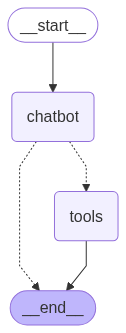

In [68]:
from IPython.display import Image, display

try:
    display(Image(tool_chatbot.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [63]:
import uuid
unique_id = uuid.uuid4()
print(f"unique ID:- {unique_id}")

unique ID:- 9f545871-4c26-4780-9aa7-12a2f59c129f


In [67]:
def test_tool_chatbot(user_message):
    print("🛠️ Testing Tool-Enabled Chatbot")
    print("=" * 50)
    
    config = {"configurable": {"thread_id": "tool_test_1"}}
    
    # Test 1: Math calculation
    print("📝 Test 1: Math Calculation")
    result1 = tool_chatbot.invoke(
        {"messages": [HumanMessage(content=user_message)]},
        config
    )
    
    for message in result1["messages"]:
        if isinstance(message, HumanMessage):
            print(f"👤 Human: {message.content}")
        elif isinstance(message, AIMessage):
            if hasattr(message, 'tool_calls') and message.tool_calls:
                print(f"🤖 AI: [Calling tool: {message.tool_calls[0]['name']}]")
            else:
                print(f"🤖 AI: {message.content}")
        elif isinstance(message, ToolMessage):
            print(f"🔧 Tool: {message.content}")
    
    
    # return result2

# Test the tool-enabled chatbot
tool_result = test_tool_chatbot("who is PM of INdia")


🛠️ Testing Tool-Enabled Chatbot
📝 Test 1: Math Calculation
👤 Human: What's 15 * 7 + sqrt(144)?
🤖 AI: [Calling tool: calculator]
🔧 Tool: The result of 15 * 7 + sqrt(144) is 117.0
🤖 AI: The result of \(15 \times 7 + \sqrt{144}\) is 117.
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have any more questions or need further assistance, feel free to ask!
🤖 AI: If you have 

In [65]:
test_simple("2+2")

{'messages': [HumanMessage(content='2+2', additional_kwargs={}, response_metadata={}, id='b80c853b-d207-4818-86bd-54cdb6c107a3'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_E3skwrknhxB9FLsVUXn8j6Hw', 'function': {'arguments': '{"expression":"2+2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 90, 'total_tokens': 106, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BniQpdeKl7Pst6233aF3JRtRdR01e', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--7b026deb-d88c-41c7-92ef-efabd7bbf639-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '2+2'}, 'id': 'call_E3skwrknhxB9FLsVUXn8j6Hw

### Human in loop

Sometimes AI agents need human oversight or approval before actions. 

## What are the Intrupts

- Review what the agent plan to do
- Modify the state if neede
- Approve or reject actions
- provide additional guidence



In [170]:
class HumanLoopState(TypedDict):
    # messages will store our conversation history
    ### add_messages is a special function  that append new message instead of replacing them

    messages: Annotated[list, add_messages]
    ask_human: bool

In [171]:
@tool
def request_human_help(question:str)  -> str:
    """
    Request help from a human Supervison.
    Args:
    question: The question or situation where human help is needed

    Returns:
        Confirmation that help has been requested

    """
    return f"Human help requested for: {question}"


human_tools = [calculator, get_current_time, request_human_help]

llm_with_human_tools = llm.bind_tools(human_tools)


In [172]:
### create a node with Human assistant logic

def chatbot_with_human_help(state: HumanLoopState) -> Dict[str, Any]:
    messages = state["messages"]
    response = llm_with_human_tools.invoke(messages)
    ask_human = False
    if hasattr(response, "tool_calls"):
        for tool_call in response.tool_calls:
            if tool_call['name'] == 'request_human_help':
                ask_human = True
    return {"messages": [response], "ask_human": ask_human}



def human_node(state: HumanLoopState) -> Dict[str, Any]:
    """
    Human intervention node- this is where human can provide input
    """
    last_message = state['messages'][-1]
    if hasattr(last_message, "tool_calls") and last_message.tool_calls:
        tool_call = last_message.tool_calls[0]
        if tool_call['name'] ==  "request_human_help":
            human_response = "I'have reviewed your question, Please process with calculation and provide a detail Explanation"
            tool_message = ToolMessage(
                content = human_response, 
                tool_call_id = tool_call['id']

            )
            return {"messages": [tool_message],
                    "ask_human": False}

    return {"ask_human": False} 
        
    

In [173]:
def route_human_loop(state: HumanLoopState) -> Literal["human", "tools", "__end__"]:
    """
    Route based on whether human help needed or tool cshould be called

    """
    if state.get("ask_human", False):
        return "human"

    messages = state['messages']
    last_message = messages[-1]

    if hasattr(last_message, "tool_calls"):
        for tool_call in last_message.tool_calls:
            if tool_call["name"] != "request_human_help":
                return "tools"
        return "human" 

    else:
        return "__end__"
    

    

    

In [174]:
d = {"a": 1, "b": 2}

In [175]:
d.get("c", False)

False

In [176]:
i = 2
def _check_if_else():
    if i==2:
        # print("conditioned matched")
        return "conditioned matched"
    else:
        return "conditioned not matched"

In [177]:
_check_if_else()

'conditioned matched'

In [178]:
human_loop_builder = StateGraph(HumanLoopState)
human_loop_builder.add_node("chatbot",chatbot_with_human_help)
human_loop_builder.add_node("tools", ToolNode(human_tools))
human_loop_builder.add_node("human", human_node)

human_loop_builder.add_edge(START, "chatbot")
human_loop_builder.add_conditional_edges(
    "chatbot",
    route_human_loop,
    {
        "human": "human",
        "tools": "tools", 
        "__end__": END
    }
)

human_loop_builder.add_edge("human", END)
human_loop_builder.add_edge("tools", END)

human_loop_chatbot = human_loop_builder.compile(
    checkpointer=memory,
    interrupt_before=["human"]

)
    
        

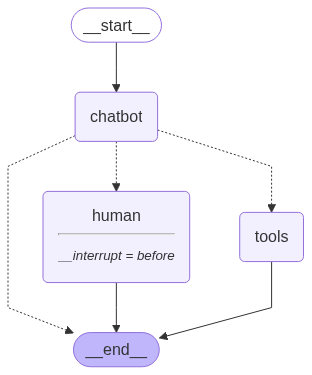

In [179]:
from IPython.display import Image, display

try:
    display(Image(human_loop_chatbot.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [180]:
def test_human_loop(user_message):
    print("🛠️ Testing Tool-Enabled Chatbot")
    print("=" * 50)
    
    config = {"configurable": {"thread_id": "human_loop_test"}}


    
    initial_result = human_loop_chatbot.invoke(
        {"messages": [HumanMessage(content=user_message)]},
        config
    )

    for message in initial_result["messages"]:
        if isinstance(message, HumanMessage):
            print(f"👤 Human: {message.content}")
        elif isinstance(message, AIMessage):
            if hasattr(message, 'tool_calls') and message.tool_calls:
                print(f"🤖 AI: [Requesting human help]")
            else:
                print(f"🤖 AI: {message.content}")

    state = human_loop_chatbot.get_state(config)
    if state.next == ("human",):
        print("In a real app, a human would now review and provide input.")
        final_result = human_loop_chatbot.invoke(None, config)
        
        # Show the final messages
        new_messages = final_result["messages"][len(initial_result["messages"]):]
        for message in new_messages:
            if isinstance(message, ToolMessage):
                print(f"👨‍💼 Human: {message.content}")
            elif isinstance(message, AIMessage):
                print(f"🤖 AI: {message.content}")
    
        return final_result
        
   

In [181]:
test_human_loop("add 2+2 and devide by 2")

🛠️ Testing Tool-Enabled Chatbot
👤 Human: add 2+2 and devide by 2
🤖 AI: [Requesting human help]
👤 Human: add 2+2 and devide by 2
👤 Human: add 2+2 and devide by 2
👤 Human: add 2+2 and devide by 2
👤 Human: add 2+2 and devide by 2
🤖 AI: The result of \((2 + 2) / 2\) is 2.0.
👤 Human: add 2+2 and devide by 2
🤖 AI: The result of \((2 + 2) / 2\) is 2.0.
👤 Human: add 2+2 and devide by 2
🤖 AI: The result of \((2 + 2) / 2\) is 2.0.
In a real app, a human would now review and provide input.


{'messages': [HumanMessage(content='add 2+2 and devide by 2', additional_kwargs={}, response_metadata={}, id='fc2f8900-9156-4872-b342-61b470828852'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_6ZujW4EiWk9J95Hz0GunFFLo', 'function': {'arguments': '{"expression":"(2 + 2) / 2"}', 'name': 'calculator'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 22, 'prompt_tokens': 146, 'total_tokens': 168, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-Bnjf8eFg6houO1pBSQ89qNibCu8dh', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f197b51a-cdd9-4aaf-aa16-fcc8a486f098-0', tool_calls=[{'name': 'calculator', 'args': {'expression': '(2 + 2) / 2'},

In [114]:
!pwd


/Users/rajeshthakur/Desktop/rajesh/Archive/teaching/agentic_ai/BMGR-MAY2025-GIAI-2/langGraph_tutorial


In [182]:
!pip freeze

absl-py==2.2.2
accelerate==1.7.0
aiofiles==24.1.0
aiohappyeyeballs==2.6.1
aiohttp==3.12.0
aiosignal==1.3.2
aiosqlite==0.21.0
altair==5.5.0
annotated-types==0.7.0
anthropic==0.54.0
anyio==4.9.0
appnope==0.1.4
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asgiref==3.8.1
asttokens==3.0.0
async-lru==2.0.5
attrs==25.3.0
babel==2.17.0
backoff==2.2.1
bcrypt==4.3.0
beautifulsoup4==4.13.4
bleach==6.2.0
blinker==1.9.0
build==1.2.2.post1
cachetools==5.5.2
certifi==2025.4.26
cffi==1.17.1
charset-normalizer==3.4.2
chromadb==1.0.12
click==8.2.0
coloredlogs==15.0.1
comm==0.2.2
contourpy==1.3.2
cycler==0.12.1
dataclasses-json==0.6.7
datasets==3.6.0
debugpy==1.8.14
decorator==5.2.1
defusedxml==0.7.1
Deprecated==1.2.18
dill==0.3.6
distro==1.9.0
duckduckgo_search==7.2.1
durationpy==0.10
evaluate==0.4.0
exa_py==1.7.1
executing==2.2.0
fastapi==0.115.9
fastjsonschema==2.21.1
ffmpy==0.5.0
filelock==3.18.0
filetype==1.2.0
firecrawl-py==1.9.0
flatbuffers==25.2.10
fonttools==4.58.0
fqdn==1.5.1
f

###  Assignment 1: Build Your First Agent
Task:
=========
- Create a Personal Assistant Agent that can:
- Have basic conversations
- Remember user's name and preferences across sessions
- Perform simple calculations
- Tell current time/date


#### Multi-Tool Research Assistant

Task:
=========
- Build a Research Assistant that can:
- Search the web for information [https://serpapi.com/]
- Summarize articles
- Save findings to a file
- Generate a final research report



### Customer Service Bot with Human Escalation

Task:
========
- Create a Customer Service Agent with human-in-the-loop:
- Handle common queries automatically
- Escalate complex issues to humans
- Manage ticket creation and tracking



In [ ]:
##### Hello